# 1. Exploratory Data Analysis 1

In [1]:
import pandas as pd

file_path = r"C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data.xlsx"

try:
    df = pd.read_excel(file_path)

    print("First Few Rows of the Dataset:")
    print(df.head())

    print("\nDataset Info:")
    df.info()

    print("\nSummary Statistics:")
    print(df.describe())

    print("\nColumns in Dataset:")
    print(df.columns.tolist())

    missing_values = df.isnull().sum()
    print("\nMissing Values Per Column:")
    print(missing_values)

except FileNotFoundError:
    print(f"Error: The file at {file_path} does not exist. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")


First Few Rows of the Dataset:
        date  fed_funds_rate    cpi  unemployment        gdp  \
0 2000-02-29            5.73  170.0           4.1  10.002179   
1 2000-03-31            5.85  171.0           4.0  10.002179   
2 2000-04-30            6.02  170.9           3.8  10.247720   
3 2000-05-31            6.27  171.2           4.0  10.247720   
4 2000-06-30            6.53  172.2           4.0  10.247720   

   nonfarm_payrolls  industrial_production   cpi_mom  \
0           131.120                91.7245  0.413467   
1           131.604                92.0830  0.588235   
2           131.883                92.6659 -0.058480   
3           132.106                92.9347  0.175541   
4           132.060                93.0018  0.584112   

   industrial_production_mom fomc_policy_stance  fomc_sentiment_score  \
0                   0.344932            Hawkish                  -0.8   
1                   0.390844            Hawkish                  -0.7   
2                   0.633016

Outlier Analysis:
fed_funds_rate: 0 outliers found
cpi: 0 outliers found
unemployment: 9 outliers found
gdp: 0 outliers found
nonfarm_payrolls: 0 outliers found
industrial_production: 0 outliers found
cpi_mom: 16 outliers found
industrial_production_mom: 13 outliers found
fomc_sentiment_score: 121 outliers found
global_gdp_growth: 36 outliers found
global_inflation_cpi: 36 outliers found
global_unemployment: 0 outliers found

Columns with outliers:
unemployment: 9 outliers
cpi_mom: 16 outliers
industrial_production_mom: 13 outliers
fomc_sentiment_score: 121 outliers
global_gdp_growth: 36 outliers
global_inflation_cpi: 36 outliers


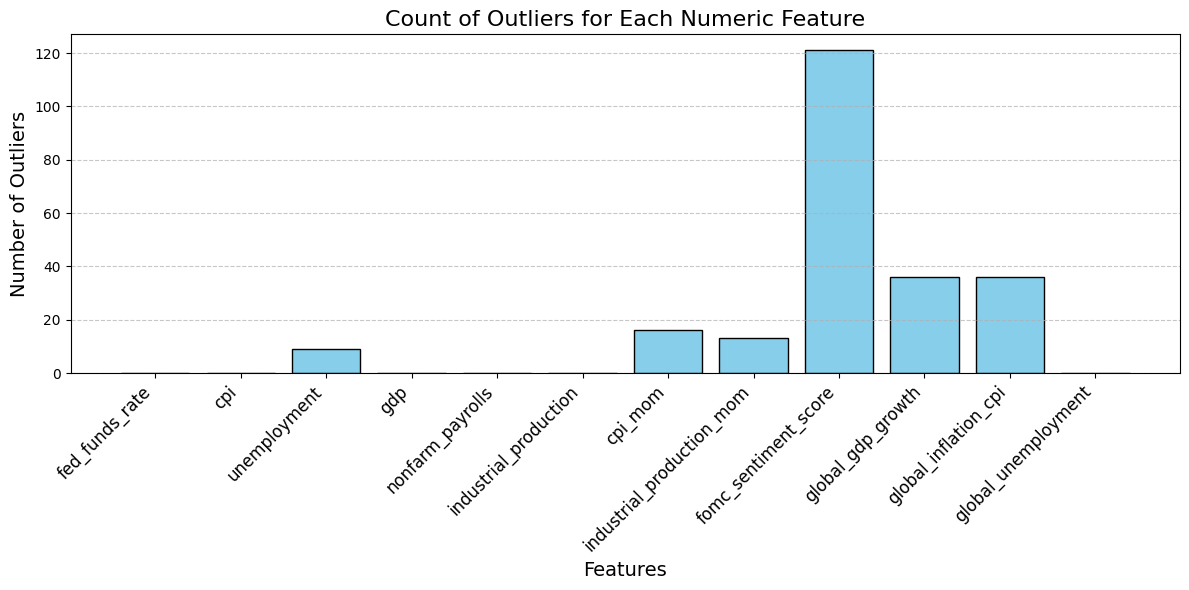

Bar chart saved to C:/Users/User/Desktop/interest rate decision/eda_outliers_barchart.png


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data.xlsx"
df = pd.read_excel(file_path)

def identify_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numeric_columns = df.select_dtypes(include=[np.number]).columns
outliers_summary = {}

print("Outlier Analysis:")
for col in numeric_columns:
    outliers = identify_outliers(df, col)
    outliers_summary[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers found")

outliers_detected = {k: v for k, v in outliers_summary.items() if v > 0}

if outliers_detected:
    print("\nColumns with outliers:")
    for col, count in outliers_detected.items():
        print(f"{col}: {count} outliers")
else:
    print("\nNo outliers detected in any column.")

plt.figure(figsize=(12, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='skyblue', edgecolor='black')
plt.title("Count of Outliers for Each Numeric Feature", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Number of Outliers", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

output_path = r"C:/Users/User/Desktop/interest rate decision/eda_outliers_barchart.png"
plt.savefig(output_path)
plt.show()

print(f"Bar chart saved to {output_path}")



# **Observations and Insights on Outliers**

The bar chart provides a clear visualization of the number of outliers detected for each numeric feature in the dataset. Below are the key observations and their potential implications:

## **1. FOMC Sentiment Score**
- **Number of Outliers**: 121 outliers
- **Possible Cause**: 
  - Sharp shifts in sentiment during significant economic events such as financial crises, major policy changes, or unexpected economic developments.
- **Impact**: 
  - These outliers are valuable for understanding extreme sentiment changes, as they reflect critical periods of heightened uncertainty or policy interventions. 
  - However, their presence might skew machine learning models if not handled appropriately (e.g., normalization or capping).

---

## **2. Global GDP Growth and Global Inflation CPI**
- **Number of Outliers**: 36 outliers each
- **Possible Cause**: 
  - These outliers likely correspond to global economic anomalies, such as:
    - The **2008 financial crisis**.
    - The **COVID-19 pandemic**.
    - Regional recessions or unexpected inflationary pressures.
- **Impact**: 
  - These outliers highlight critical periods of economic disruption.
  - Their alignment with historical events makes them essential for understanding global economic trends and their influence on U.S. monetary policy decisions.

---

## **3. CPI MoM (Month-over-Month Consumer Price Index Growth) and Industrial Production MoM**
- **Number of Outliers**: 
  - CPI MoM: 16 outliers
  - Industrial Production MoM: 13 outliers
- **Possible Cause**: 
  - Month-to-month economic volatility during periods of significant shifts, such as:
    - Rapid economic recovery phases.
    - Periods of inflationary spikes or industrial slowdowns.
- **Impact**: 
  - These features capture transient economic dynamics that may heavily influence monetary policy, particularly during periods of heightened volatility.

---

## **4. Unemployment**
- **Number of Outliers**: 9 outliers
- **Possible Cause**: 
  - Large deviations in unemployment rates, often linked to:
    - Major layoffs during recessions.
    - Rapid economic recoveries or labor market shifts.
- **Impact**: 
  - These outliers reflect critical disruptions in the labor market, which are pivotal for monetary policy considerations, especially in meeting employment mandates.

---

## **5. Other Features**
- **Features with No Outliers**: 
  - **Fed Funds Rate**, **CPI**, **GDP**, and **Global Unemployment**.
- **Observation**: 
  - These variables exhibit more stable distributions over time, reflecting consistent trends or smoother economic adjustments.
- **Impact**: 
  - Their stability provides a reliable baseline for modeling, complementing the volatility captured in other features.

---

### **Summary**
The outliers observed in key features align closely with significant historical economic events, such as the **2008 financial crisis**, the **COVID-19 pandemic**, and recovery periods. These outliers are not merely anomalies but represent critical economic shifts that provide valuable context for understanding monetary policy decisions. While essential for insights, appropriate handling of these outliers is crucial to prevent their disproportionate influence on predictive models.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

file_path = r"C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data.xlsx"
data = pd.read_excel(file_path)

historical_events = {
    "2008-09-15": "Lehman Collapse",
    "2001-03-01": "Dot-com Bubble",
    "2020-03-11": "COVID-19 Pandemic",
    "2011-08-01": "Debt Ceiling Crisis"
}
data['event'] = data['date'].astype(str).map(historical_events).fillna('No Event')

output_directory = r"C:\Users\User\Desktop\interest rate decision\workfile\eda_graphs"
os.makedirs(output_directory, exist_ok=True)

indicators = ['global_gdp_growth', 'global_inflation_cpi', 'unemployment', 'fomc_sentiment_score']

for column in indicators:
    plt.figure(figsize=(12, 6))
    plt.plot(data['date'], data[column], label=column, color='blue', linewidth=2)
    plt.scatter(data['date'], data[column], color='red', alpha=0.6, label="Outliers")
    for date, event in historical_events.items():
        if date in data['date'].astype(str).values:
            plt.axvline(pd.to_datetime(date), color='orange', linestyle='--', linewidth=1)
            plt.text(pd.to_datetime(date), data[column].max(), event, rotation=90, color='black', fontsize=9)
    plt.title(f"Trend and Outliers in {column} Over Time")
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    file_path = f"{output_directory}/{column}_trend_outliers.png"
    plt.savefig(file_path)
    plt.close()
    print(f"Saved: {file_path}")

plt.figure(figsize=(12, 6))
plt.scatter(data['fomc_sentiment_score'], data['fed_funds_rate'], alpha=0.6, color='purple')
plt.title("FOMC Sentiment Score vs. Federal Funds Rate")
plt.xlabel("FOMC Sentiment Score")
plt.ylabel("Federal Funds Rate")
plt.grid()
plt.tight_layout()
scatter_path = f"{output_directory}/fomc_sentiment_vs_fed_funds_rate.png"
plt.savefig(scatter_path)
plt.close()
print(f"Saved: {scatter_path}")


Saved: C:\Users\User\Desktop\interest rate decision\workfile\eda_graphs/global_gdp_growth_trend_outliers.png
Saved: C:\Users\User\Desktop\interest rate decision\workfile\eda_graphs/global_inflation_cpi_trend_outliers.png
Saved: C:\Users\User\Desktop\interest rate decision\workfile\eda_graphs/unemployment_trend_outliers.png
Saved: C:\Users\User\Desktop\interest rate decision\workfile\eda_graphs/fomc_sentiment_score_trend_outliers.png
Saved: C:\Users\User\Desktop\interest rate decision\workfile\eda_graphs/fomc_sentiment_vs_fed_funds_rate.png


# **Analysis of Key Features Over Time**

## **1. FOMC Sentiment Score Over Time**

### **Observation**:
The FOMC sentiment score shows significant variability over time, with notable peaks and troughs. The outliers (marked in red) correspond to extreme sentiment scores, which may reflect periods of substantial policy shifts or heightened economic uncertainty.

### **Insights**:
- Positive sentiment scores often align with optimistic economic outlooks or expansionary monetary policy.
- Negative scores are associated with concerns about economic contractions or restrictive monetary policies.
- Key outliers may correspond to events such as the **2008 financial crisis**, the **COVID-19 pandemic**, or periods of significant policy announcements.

### **Historical Context**:
- The sharp drops around **2008** align with the global financial crisis.
- Spikes in recent years could correspond to economic recovery phases or significant Federal Reserve interventions during COVID-19.

---

## **2. FOMC Sentiment Score vs. Federal Funds Rate**

### **Observation**:
There is no simple linear relationship between the FOMC sentiment score and the federal funds rate, as the rate adjustments reflect a complex interplay of economic conditions.

### **Insights**:
- Periods of highly positive or negative sentiment align with significant changes in the federal funds rate.
- Neutral sentiment values tend to cluster around moderate federal funds rates, indicating stability.

### **Historical Context**:
- The extreme negative sentiment scores during the **2008 crisis** align with substantial rate cuts.
- The sentiment variability in **2020** reflects the Federal Reserve’s aggressive rate adjustments during the COVID-19 pandemic.

---

## **3. Global GDP Growth Over Time**

### **Observation**:
The global GDP growth rate exhibits distinct phases of growth and contraction, with sharp declines corresponding to major economic crises.

### **Insights**:
- Significant dips align with known global recessions, such as:
  - The **2008 global financial crisis**, marked by a sharp contraction.
  - The **2020 COVID-19 pandemic**, which caused an unprecedented drop.
- Growth phases reflect periods of economic recovery and stability.

### **Historical Context**:
- The sharp recovery post-**2009** aligns with global stimulus measures.
- The decline in **2020** highlights the economic disruption caused by the pandemic.

---

## **4. Global Inflation CPI Over Time**

### **Observation**:
Inflation rates demonstrate periods of stability, followed by sharp increases or decreases during significant global events.

### **Insights**:
- Inflation spikes during the **2008 crisis** likely reflect supply chain disruptions and monetary policies.
- The **2020 inflation dip** corresponds to reduced economic activity during COVID-19 lockdowns, followed by recent spikes due to supply chain constraints and stimulus measures.

### **Historical Context**:
- The sharp inflation increase post-**2020** reflects supply chain disruptions and fiscal stimulus in response to the pandemic.
- Earlier dips (e.g., **2008**) align with recessions and lower demand.

---

## **5. Unemployment Over Time**

### **Observation**:
Unemployment trends clearly correlate with economic cycles, showing peaks during crises and steady declines during recoveries.

### **Insights**:
- The sharp rise in unemployment in **2008** and **2020** aligns with the global financial crisis and COVID-19, respectively.
- Subsequent declines reflect economic recovery efforts and job creation.

### **Historical Context**:
- The **2008 peak** aligns with the widespread layoffs during the financial crisis.
- The **record-high unemployment during 2020** reflects the impact of pandemic-related lockdowns, followed by rapid recovery due to government support measures.

---

## **Summary**
The observed anomalies and trends in these graphs align with major historical economic events, such as the **2008 global financial crisis**, the **COVID-19 pandemic**, and subsequent recovery periods. These insights validate the data’s reliability and relevance for predicting FOMC decisions, as they highlight clear relationships between economic indicators and significant events.


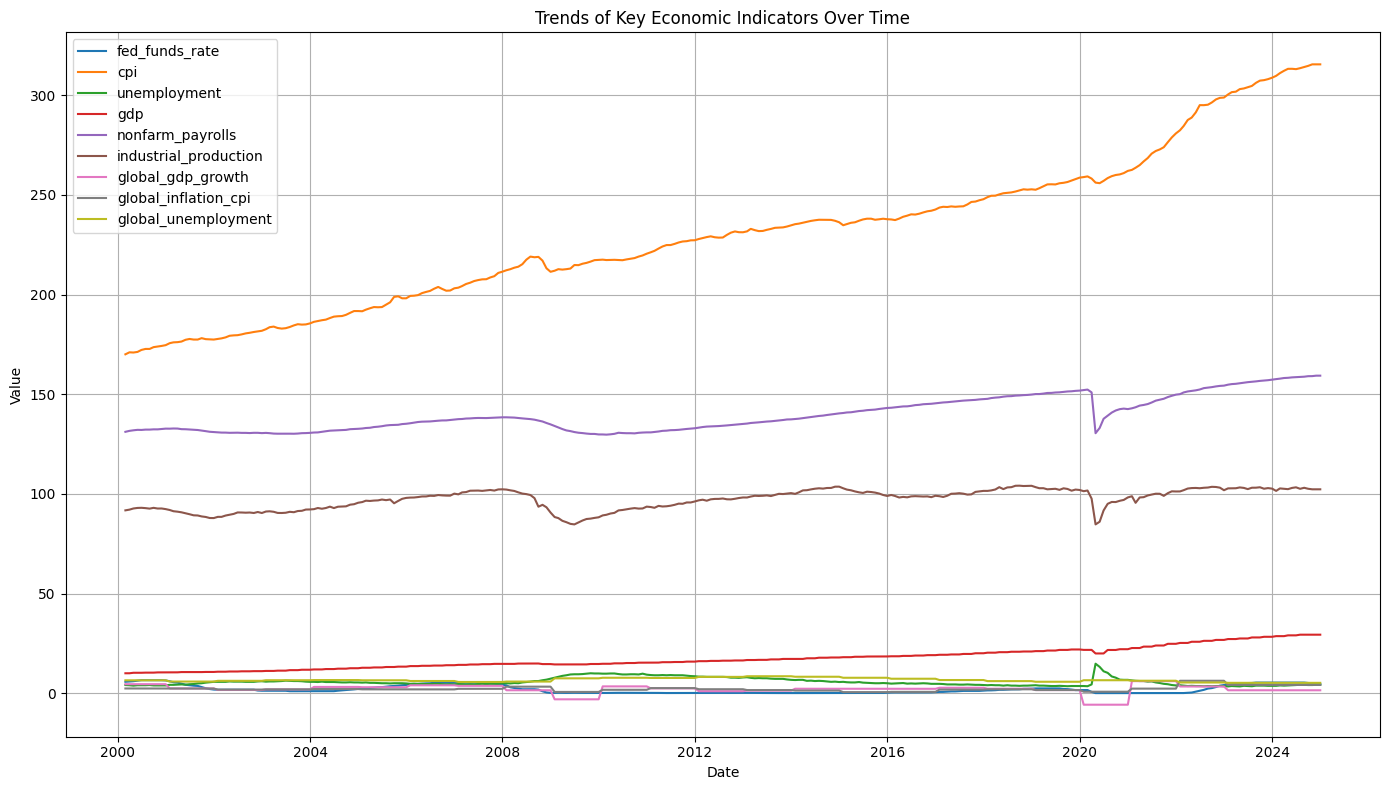

C:\Users\User\AppData\Local\Temp\ipykernel_236364\4225017965.py:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


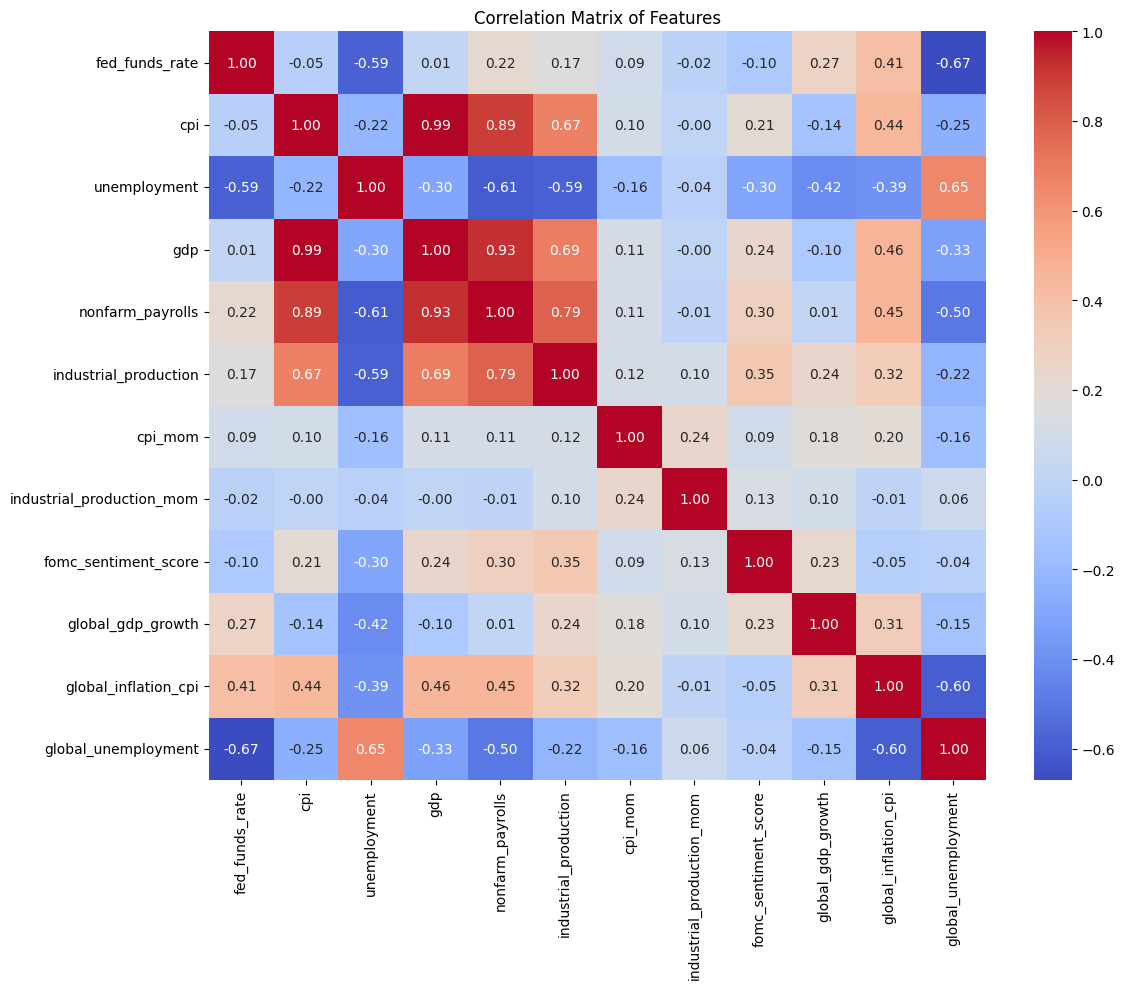

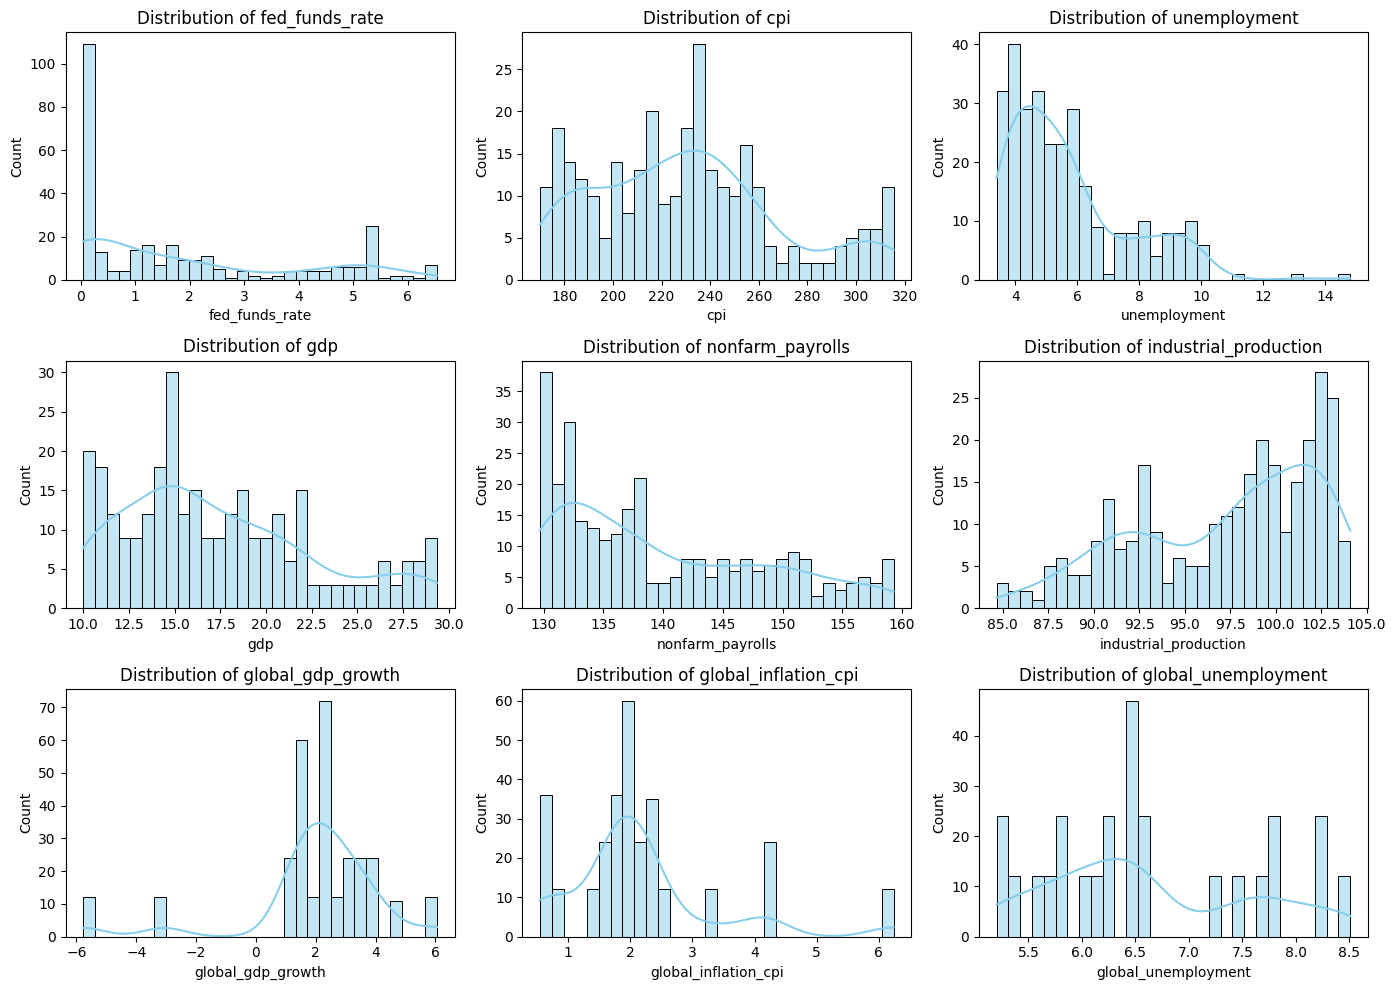

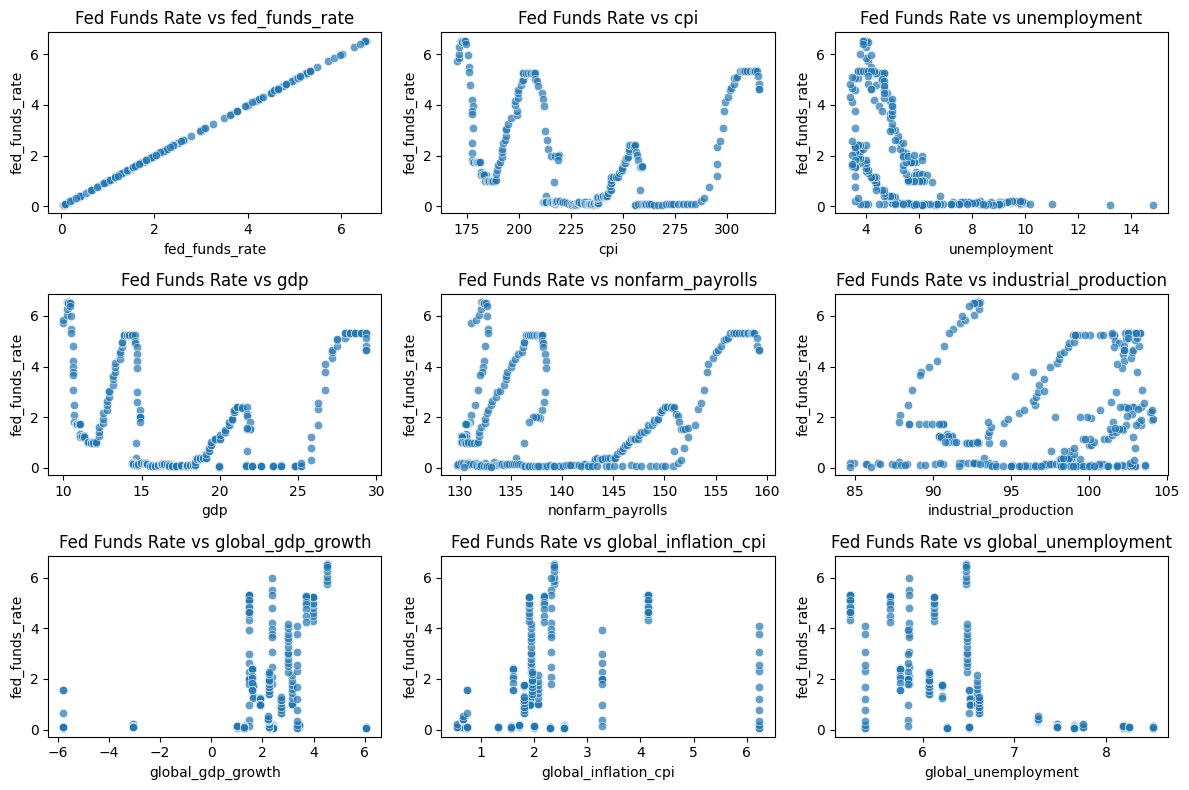

Trends, correlations, distributions, and scatter plots saved as PNG files.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:\\Users\\User\\Desktop\\interest rate decision\\workfile\\final_merged_data.xlsx"
data = pd.read_excel(file_path)

data['date'] = pd.to_datetime(data['date'])

data.set_index('date', inplace=True)

key_features = ['fed_funds_rate', 'cpi', 'unemployment', 'gdp',
                'nonfarm_payrolls', 'industrial_production',
                'global_gdp_growth', 'global_inflation_cpi', 'global_unemployment']

plt.figure(figsize=(14, 8))
for feature in key_features:
    plt.plot(data.index, data[feature], label=feature)

plt.title("Trends of Key Economic Indicators Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("trends_over_time.png")
plt.show()

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.savefig("correlation_matrix.png")
plt.show()

plt.figure(figsize=(14, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.savefig("feature_distributions.png")
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data[feature], y=data['fed_funds_rate'], alpha=0.7)
    plt.title(f"Fed Funds Rate vs {feature}")
plt.tight_layout()
plt.savefig("scatter_plots.png")
plt.show()

print("Trends, correlations, distributions, and scatter plots saved as PNG files.")


# **Observations and Insights**

## **1. Correlation Matrix (First Image)**

### **Highly Correlated Variables**
- **CPI (Consumer Price Index)** shows strong positive correlations with:
  - **GDP** (0.99): This highlights the interconnectedness between inflation and economic growth, as GDP growth often accompanies inflationary pressures.
  - **Nonfarm Payrolls** (0.93): A clear link between payroll increases and overall economic activity, reflecting phases of economic expansion.
- **Global Inflation CPI** correlates moderately with:
  - **Global GDP Growth** (0.44): Indicates that inflation trends are partially driven by global economic activity, emphasizing the influence of international markets on domestic inflation.

### **Negative Correlations**
- **Fed Funds Rate** exhibits a strong negative correlation with:
  - **Global Unemployment** (-0.67): This aligns with the Federal Reserve's dual mandate of promoting employment through rate cuts during economic downturns.

### **Weak Correlations**
- **FOMC Sentiment Score** has weak correlations with most variables but shows:
  - A slight positive correlation with **Industrial Production** (0.35): Suggests that FOMC sentiment may loosely track trends in economic production, particularly during industrial booms or slowdowns.

---

## **2. Feature Distributions (Second Image)**

### **Skewed Distributions**
- **Fed Funds Rate**:
  - Heavily skewed towards lower rates, especially post-2008 financial crisis, reflecting the extended period of near-zero interest rates to stimulate the economy.
- **Unemployment**:
  - Skewed distribution with clear peaks during recessions such as 2008 and 2020, highlighting significant economic contractions during these periods.

### **Global Indicators**
- **Global GDP Growth** and **Global Inflation CPI**:
  - Display peaks and troughs that correspond to major economic crises, such as the 2008 global financial crisis and the COVID-19 pandemic.
- These trends indicate how global economic disruptions significantly impact domestic economic indicators.

### **Insights**
- The diversity in distributions suggests the need for feature scaling or transformations, such as logarithmic scaling for skewed features, to enhance model performance and interpretability.

---

## **3. Scatter Plots (Third Image)**

### **Fed Funds Rate vs. Features**
- **Clusters**:
  - Observed clusters between **Fed Funds Rate** and variables like **CPI**, **GDP**, and **Nonfarm Payrolls**, indicating distinct economic phases such as expansions or contractions.
- **Nonlinear Relationships**:
  - No clear linear relationships for global indicators like **Global GDP Growth** or **Global Inflation CPI**, suggesting potential complex interactions.

### **Insights**
- The observed patterns suggest that advanced machine learning models (e.g., tree-based models like Random Forest or Gradient Boosting) may better capture these nonlinear relationships than traditional linear regression models.

---

## **4. Trends Over Time (Fourth Image)**

### **Fed Funds Rate**
- Reflects major policy cycles:
  - **Rate hikes** during periods of economic stability (e.g., pre-2008).
  - **Sharp cuts** during crises (e.g., 2008 global financial crisis, COVID-19 pandemic).

### **CPI**
- Exhibits a steady upward trend, reflecting long-term inflationary pressures and the Federal Reserve's ongoing battle to stabilize price levels.

### **Unemployment**
- Peaks during crises:
  - The 2008 global financial crisis led to widespread layoffs.
  - The 2020 COVID-19 pandemic caused a record spike in unemployment, followed by rapid recovery.

### **Global Indicators**
- **Global GDP Growth** and **Global Inflation CPI**:
  - Demonstrate synchronized trends that align with major global events, such as:
    - **2008 financial crisis**: Marked by significant contractions.
    - **2020 COVID-19 pandemic**: Highlighted by economic disruptions and subsequent recoveries.

---

### **Conclusion**
The combined analysis of correlations, distributions, scatter plots, and time-series trends provides a comprehensive understanding of the dataset:
1. Strong correlations between key economic indicators (e.g., CPI, GDP, and Nonfarm Payrolls) highlight interconnected economic behaviors.
2. Diverse feature distributions and outlier patterns emphasize the importance of scaling and robust preprocessing.
3. Nonlinear interactions suggest the suitability of advanced machine learning algorithms to capture complex dynamics.
4. Historical trends validate the dataset's reliability, showcasing its alignment with major global economic events, making it highly relevant for predicting FOMC decisions.


# **Why Conduct EDA Before Feature Engineering?**

Exploratory Data Analysis (EDA) serves as the cornerstone for effective and meaningful feature engineering by providing a structured understanding of the data. Below are the key reasons and benefits of conducting EDA before creating features:

---

## **1. Understanding the Data**
- **Purpose**: EDA ensures that feature engineering is informed by insights derived from the dataset itself, rather than relying on assumptions.
- **Impact**:
  - Relationships, trends, and patterns in the data were identified and guided the creation of meaningful features.
  - **Example**:
    - Strong correlations, such as between **CPI** and **GDP**, informed the development of interaction terms to capture these dependencies.
    - Temporal trends in variables like **unemployment** and **FOMC sentiment score** supported the creation of lagged and cumulative features.

---

## **2. Outlier Management**
- **Purpose**: Outliers often hold valuable information, particularly in economic datasets, where anomalies may correspond to significant events or crises.
- **Impact**:
  - Instead of outright removing outliers, they were analyzed for their potential utility in feature creation.
  - **Example**:
    - Features such as **crisis indicators** were inspired by validated outliers in variables like **global GDP growth** and **FOMC sentiment score**, reflecting periods of heightened uncertainty or policy shifts.

---

## **3. Feature Relevance**
- **Purpose**: Identifying which variables most influence the target variable ensures that feature creation focuses on impactful dimensions of the data.
- **Impact**:
  - Correlation analysis and scatter plots were utilized to highlight variables strongly associated with the target variable (**fed_funds_rate**).
  - **Example**:
    - Variables like **unemployment** and **CPI rolling averages** were prioritized for feature creation due to their strong relationship with monetary policy decisions.

---

## **4. Avoiding Redundant Features**
- **Purpose**: Feature redundancy adds noise and unnecessary complexity to models, which can degrade performance and interpretability.
- **Impact**:
  - Visualization of distributions, trends, and correlations ensured that new features provided unique information rather than duplicating existing patterns.
  - **Example**:
    - Variables with similar distributions and correlations (e.g., **GDP rolling averages** vs. **CPI rolling averages**) were carefully examined to avoid duplication.

---

## **5. Enhancing Model Interpretability**
- **Purpose**: EDA identifies variables that align with economic theory, ensuring that the model remains interpretable and relevant for stakeholders.
- **Impact**:
  - Features were engineered to reflect well-established economic principles.
  - **Example**:
    - Variables like **CPI** (linked to inflation) and **unemployment** (a marker of economic health) were prioritized, ensuring the model aligns with Federal Reserve policies and objectives.

---

## **6. Data-Driven Decisions**
- **Purpose**: EDA helps identify opportunities for creating advanced features, ensuring that they are justified by the data itself.
- **Impact**:
  - Rolling averages, growth rates, and sentiment-adjusted variables were directly inspired by observed patterns and anomalies in the dataset.
  - **Example**:
    - The introduction of **momentum features** (e.g., **CPI momentum**) was driven by observed shifts in economic acceleration and deceleration.

---

## **Conclusion**
Conducting EDA before feature engineering establishes a **data-driven approach**, reducing trial-and-error and improving the efficiency of feature creation. Insights derived during this phase:
- **Guide the development of relevant and impactful features.**
- **Minimize unnecessary complexity in the model.**
- **Enhance interpretability by aligning features with economic theory and policy-making frameworks.**

EDA is a **crucial step** for building robust, interpretable, and high-performing models, ensuring that feature engineering is purposeful and reflective of the dataset's inherent patterns.


# 2. Feature Engineering


In [19]:
import pandas as pd

input_file_path = r"C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data.xlsx"
output_file_path = r"C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data_with_features.xlsx"

data = pd.read_excel(input_file_path)

data['date'] = pd.to_datetime(data['date'])
data.sort_values(by='date', inplace=True)

for col in ['cpi', 'gdp', 'unemployment']:
    data[f'{col}_3m_avg'] = data[col].rolling(window=3).mean()
    data[f'{col}_6m_avg'] = data[col].rolling(window=6).mean()
    data[f'{col}_lag_1'] = data[col].shift(1)
    data[f'{col}_lag_3'] = data[col].shift(3)

data['cpi_unemployment_interaction'] = data['cpi'] * data['unemployment']

for col in ['cpi', 'gdp']:
    data[f'{col}_mom_growth'] = data[col].pct_change() * 100  # Month-over-Month Growth
    data[f'{col}_momentum'] = data[col] - data[col].rolling(window=3).mean()

data['fomc_sentiment_cumulative'] = data['fomc_sentiment_score'].cumsum()

for col in ['cpi', 'gdp']:
    data[f'{col}_volatility'] = data[col].rolling(window=3).std()

data.to_excel(output_file_path, index=False)
print(f"Updated dataset with new features saved to {output_file_path}")


Updated dataset with new features saved to C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data_with_features.xlsx


In [21]:
import pandas as pd

file_path = r"C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data_with_features.xlsx"

try:
    df = pd.read_excel(file_path)

    print("First Few Rows of the Dataset:")
    print(df.head())

    print("\nDataset Info:")
    df.info()

    print("\nSummary Statistics:")
    print(df.describe())

    print("\nColumns in Dataset:")
    print(df.columns.tolist())

    missing_values = df.isnull().sum()
    print("\nMissing Values Per Column:")
    print(missing_values)

except FileNotFoundError:
    print(f"Error: The file at {file_path} does not exist. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")


First Few Rows of the Dataset:
        date  fed_funds_rate    cpi  unemployment        gdp  \
0 2000-02-29            5.73  170.0           4.1  10.002179   
1 2000-03-31            5.85  171.0           4.0  10.002179   
2 2000-04-30            6.02  170.9           3.8  10.247720   
3 2000-05-31            6.27  171.2           4.0  10.247720   
4 2000-06-30            6.53  172.2           4.0  10.247720   

   nonfarm_payrolls  industrial_production   cpi_mom  \
0           131.120                91.7245  0.413467   
1           131.604                92.0830  0.588235   
2           131.883                92.6659 -0.058480   
3           132.106                92.9347  0.175541   
4           132.060                93.0018  0.584112   

   industrial_production_mom fomc_policy_stance  ...  unemployment_lag_1  \
0                   0.344932            Hawkish  ...                 NaN   
1                   0.390844            Hawkish  ...                 4.1   
2                  

In [38]:
import pandas as pd

file_path = r"C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data_cleaned.xlsx"
df = pd.read_excel(file_path)


df['fed_funds_rate_before'] = df['fed_funds_rate'].shift(1)  
df['fed_funds_rate_after'] = df['fed_funds_rate']  
df['rate_change'] = df['fed_funds_rate_after'] - df['fed_funds_rate_before']

def map_rate_change_to_class(rate_change):
    if rate_change == -0.50:
        return 0
    elif rate_change == -0.25:
        return 1
    elif rate_change == 0.00:
        return 2
    elif rate_change == 0.25:
        return 3
    elif rate_change == 0.50:
        return 4
    else:
        return None 

df['rate_adjustment_class'] = df['rate_change'].apply(map_rate_change_to_class)

output_path = r"C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data_with_target.xlsx"
df.to_excel(output_path, index=False)

print(f"Updated dataset saved to: {output_path}")


Updated dataset saved to: C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data_with_target.xlsx


In [42]:
import pandas as pd

file_path = r"C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data_with_target.xlsx"
data = pd.read_excel(file_path)

rolling_columns = [
    'cpi_3m_avg', 'cpi_6m_avg', 'gdp_3m_avg', 'gdp_6m_avg',
    'unemployment_3m_avg', 'unemployment_6m_avg',
    'cpi_lag_1', 'cpi_lag_3', 'gdp_lag_1', 'gdp_lag_3',
    'unemployment_lag_1', 'unemployment_lag_3'
]

momentum_growth_columns = [
    'cpi_mom_growth', 'cpi_momentum', 'gdp_mom_growth', 'gdp_momentum'
]

volatility_columns = ['cpi_volatility', 'gdp_volatility']

columns_to_process = {
    'Rolling': rolling_columns,
    'Momentum and Growth': momentum_growth_columns,
    'Volatility': volatility_columns
}

for category, columns in columns_to_process.items():
    existing_columns = [col for col in columns if col in data.columns]
    if existing_columns:
        if category == 'Rolling':
            data[existing_columns] = data[existing_columns].fillna(method='ffill').fillna(data[existing_columns].mean())
        else:
            data[existing_columns] = data[existing_columns].fillna(data[existing_columns].mean())
    else:
        print(f"No columns found for {category}.")

missing_values = data.isnull().sum()
print("Missing values per column after handling:")
print(missing_values)

output_file_path = r"C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data_cleaned.xlsx"
data.to_excel(output_file_path, index=False)
print(f"Cleaned dataset saved to: {output_file_path}")


Missing values per column after handling:
date                            0
fed_funds_rate                  0
cpi                             0
unemployment                    0
gdp                             0
nonfarm_payrolls                0
industrial_production           0
cpi_mom                         0
industrial_production_mom       0
fomc_policy_stance              0
fomc_sentiment_score            0
global_gdp_growth               0
global_inflation_cpi            0
global_unemployment             0
cpi_3m_avg                      0
cpi_6m_avg                      0
cpi_lag_1                       0
cpi_lag_3                       0
gdp_3m_avg                      0
gdp_6m_avg                      0
gdp_lag_1                       0
gdp_lag_3                       0
unemployment_3m_avg             0
unemployment_6m_avg             0
unemployment_lag_1              0
unemployment_lag_3              0
cpi_unemployment_interaction    0
cpi_mom_growth                  0
cpi_mo

In [46]:
import pandas as pd

file_path = r"C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data_with_target.xlsx"
df = pd.read_excel(file_path)

def classify_rate_change(rate_change):
    if rate_change <= -0.375:
        return '-0.50%'
    elif -0.375 < rate_change <= -0.125:
        return '-0.25%'
    elif -0.125 < rate_change <= 0.125:
        return '0%'
    elif 0.125 < rate_change <= 0.375:
        return '+0.25%'
    else:
        return '+0.50%'

df['rate_adjustment_class'] = df['rate_change'].apply(classify_rate_change)

output_path = r"C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data_with_classes.xlsx"
df.to_excel(output_path, index=False)

print(f"Updated dataset with rate adjustment classes saved to: {output_path}")
class_distribution = df['rate_adjustment_class'].value_counts()
print("Class Distribution:\n", class_distribution)


Updated dataset with rate adjustment classes saved to: C:\Users\User\Desktop\interest rate decision\workfile\final_merged_data_with_classes.xlsx
Class Distribution:
 0%        220
+0.25%     38
-0.25%     21
-0.50%     13
+0.50%      7
Name: rate_adjustment_class, dtype: int64


# Feature Engineering

## Newly Created Features

To improve interpretability and predictive power, the following features were engineered:

### 1. Rolling Averages
- **Features**: `cpi_3m_avg`, `cpi_6m_avg`, `gdp_3m_avg`, `gdp_6m_avg`, `unemployment_3m_avg`, `unemployment_6m_avg`
- **Purpose**:
  - Smooth short-term fluctuations in economic data to capture trends.
  - Enable models to focus on longer-term patterns rather than noise.
- **Example**: `cpi_3m_avg` represents the average CPI over the last three months.
- **Rationale**: A rolling average highlights sustained inflation trends, aiding in policy forecasting.

### 2. Lagged Features
- **Features**: `cpi_lag_1`, `cpi_lag_3`, `gdp_lag_1`, `gdp_lag_3`, `unemployment_lag_1`, `unemployment_lag_3`
- **Purpose**:
  - Capture historical values to understand temporal relationships.
  - Enable models to predict outcomes based on past conditions.
- **Example**: `cpi_lag_1` is the CPI value from one month ago.
- **Rationale**: Past values of CPI influence present decisions on monetary policy.

### 3. Interaction Terms
- **Features**: `cpi_unemployment_interaction`
- **Purpose**:
  - Reflect economic relationships between inflation and unemployment.
  - Capture how simultaneous changes in these indicators impact policy decisions.
- **Example**: `cpi_unemployment_interaction = cpi * unemployment`.
- **Rationale**: A high CPI combined with high unemployment signifies stagflation, requiring specific policy actions.

### 4. Momentum Features
- **Features**: `cpi_momentum`, `gdp_momentum`
- **Purpose**:
  - Quantify the rate of change to measure economic acceleration or deceleration.
  - Highlight critical turning points in economic activity.
- **Example**: `cpi_momentum` measures the difference between the current CPI and its rolling average.
- **Rationale**: Positive momentum indicates rising inflationary pressures.

### 5. Growth Features
- **Features**: `cpi_mom_growth`, `gdp_mom_growth`
- **Purpose**:
  - Quantify the percentage growth in inflation and GDP month-over-month.
  - Enable analysis of growth trends and shocks.
- **Example**: `cpi_mom_growth = (Current CPI - Previous CPI) / Previous CPI`.
- **Rationale**: Sharp changes in growth rates can signal economic disruptions.

### 6. Cumulative Features
- **Features**: `fomc_sentiment_cumulative`
- **Purpose**:
  - Aggregate FOMC sentiment over time to reflect long-term policy tone.
  - Assess the overall shift in monetary policy stance.
- **Example**: `fomc_sentiment_cumulative` sums up `fomc_sentiment_score` over time.
- **Rationale**: Persistent hawkish or dovish sentiment impacts rate decisions cumulatively.

### 7. Volatility Features
- **Features**: `cpi_volatility`, `gdp_volatility`
- **Purpose**:
  - Measure economic uncertainty by quantifying data variability.
  - Highlight periods of instability or rapid change.
- **Example**: `cpi_volatility = Standard deviation of CPI over the last 6 months`.
- **Rationale**: High volatility in inflation can indicate market disruptions.

---

## Why We Created the `rate_change` Feature and Defined Classes

### Purpose
The goal of this challenge is to build a multiclass classification model to predict the Federal Open Market Committee's (FOMC) next rate adjustment. The target variable represents the likely size of the federal funds rate adjustment, which could be one of five possible categories: `-0.50%`, `-0.25%`, `0%`, `+0.25%`, or `+0.50%`.

### Steps Taken
1. **Calculate the `rate_change`:**
   - Formula: `rate_change = current_rate - previous_rate`
   - Captures the difference in the federal funds rate between consecutive FOMC meetings.

2. **Convert `rate_change` to Target Classes:**
   - **Thresholds:**
     - `rate_change <= -0.375` → `-0.50%`
     - `-0.375 < rate_change <= -0.125` → `-0.25%`
     - `-0.125 < rate_change <= 0.125` → `0%`
     - `0.125 < rate_change <= 0.375` → `+0.25%`
     - `rate_change > 0.375` → `+0.50%`

### Rationale for Creating `rate_change` and Classes
1. **Align with Challenge Requirements:**
   - The challenge requires predictions in five categories based on realistic FOMC policy increments.
2. **Reflect Policy Decision-Making:**
   - Aligns with typical FOMC rate adjustments, balancing employment and inflation.
3. **Facilitate Model Training:**
   - Discrete classes simplify training and evaluation for multiclass classification models.
4. **Enhance Interpretability:**
   - Predictions in clear categories are actionable and intuitive for stakeholders.

---

## How This Feature Helps
1. **Economic Interpretation:** Predicting rate changes in realistic increments aligns with FOMC decision-making processes.
2. **Actionability:** Enables stakeholders, such as investors or policymakers, to anticipate and prepare for market impacts.
3. **Model Clarity:** Provides clear, actionable predictions instead of ambiguous continuous values.

---

### **Key Points for the Report**
- **`rate_change`**: Captures the magnitude and direction of federal funds rate adjustments.
- **Target Classes**: Represent standard FOMC rate increments, ensuring interpretability and policy alignment.
- **Model Relevance**: Bridges the gap between raw data and challenge requirements, enhancing suitability for modeling.


# 3. Exploratory Data Analysis 2

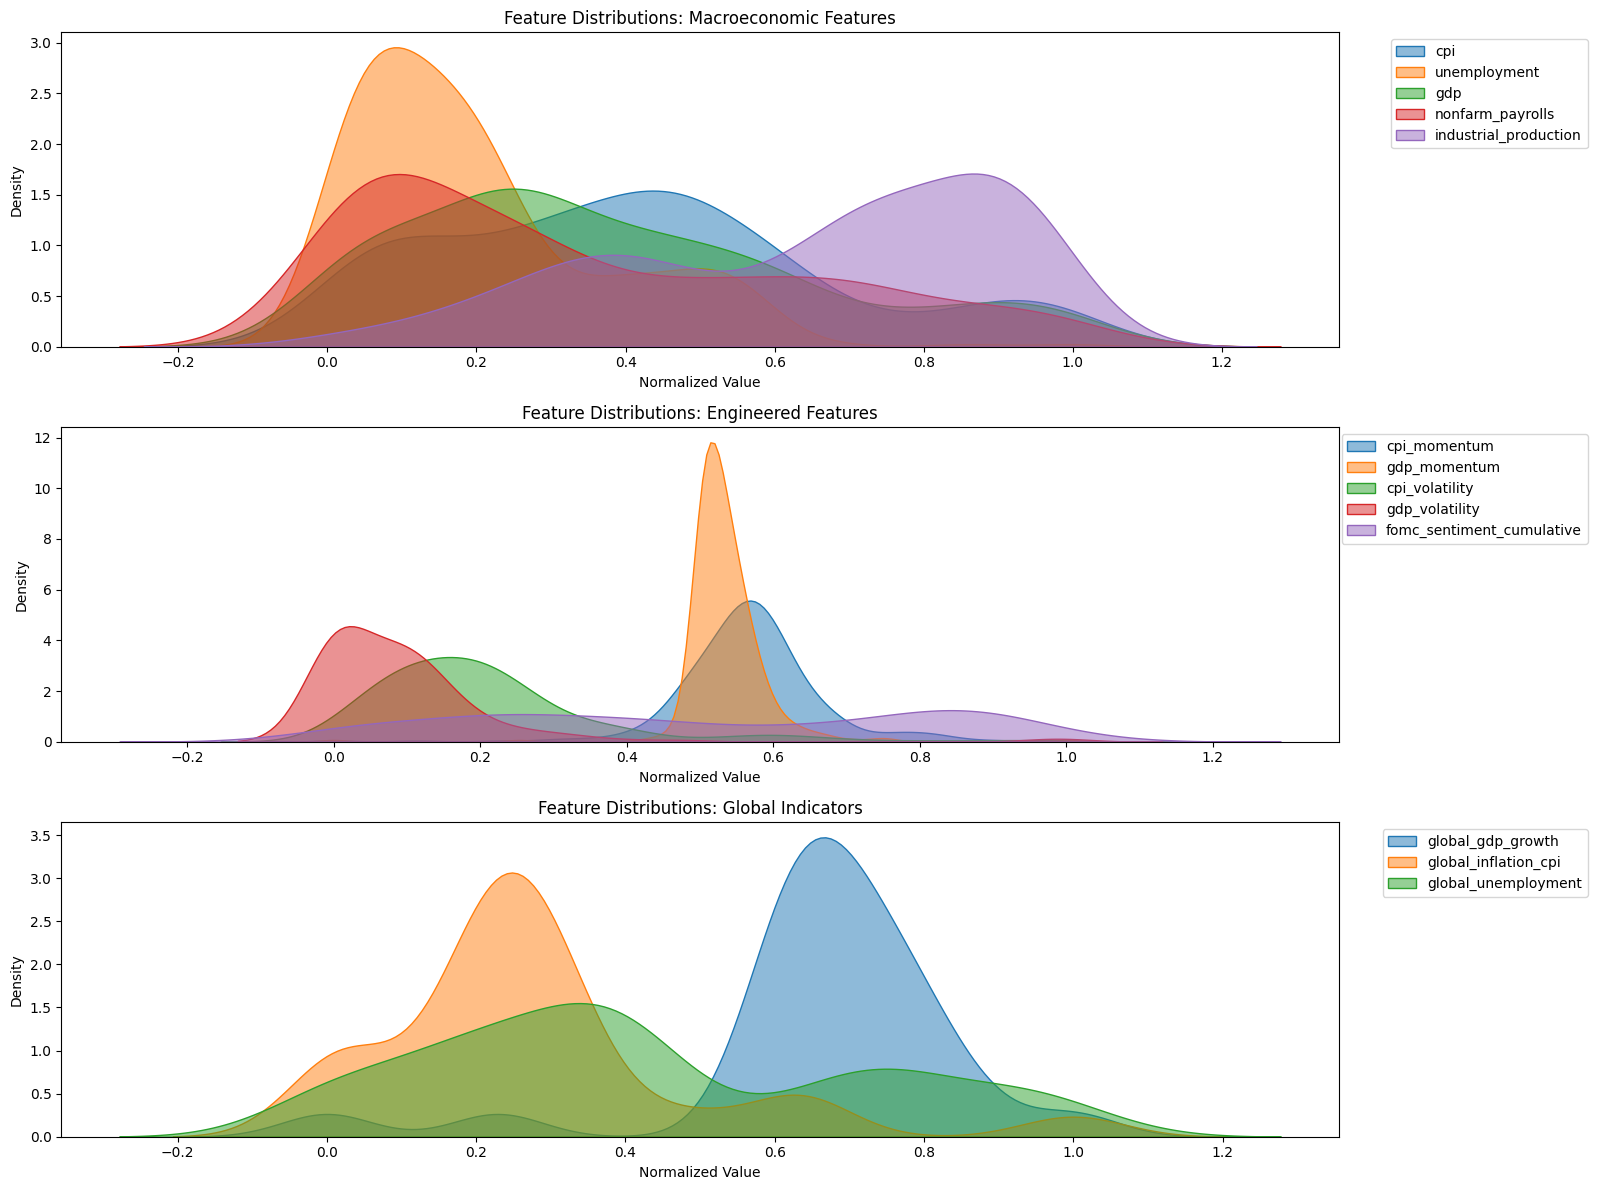

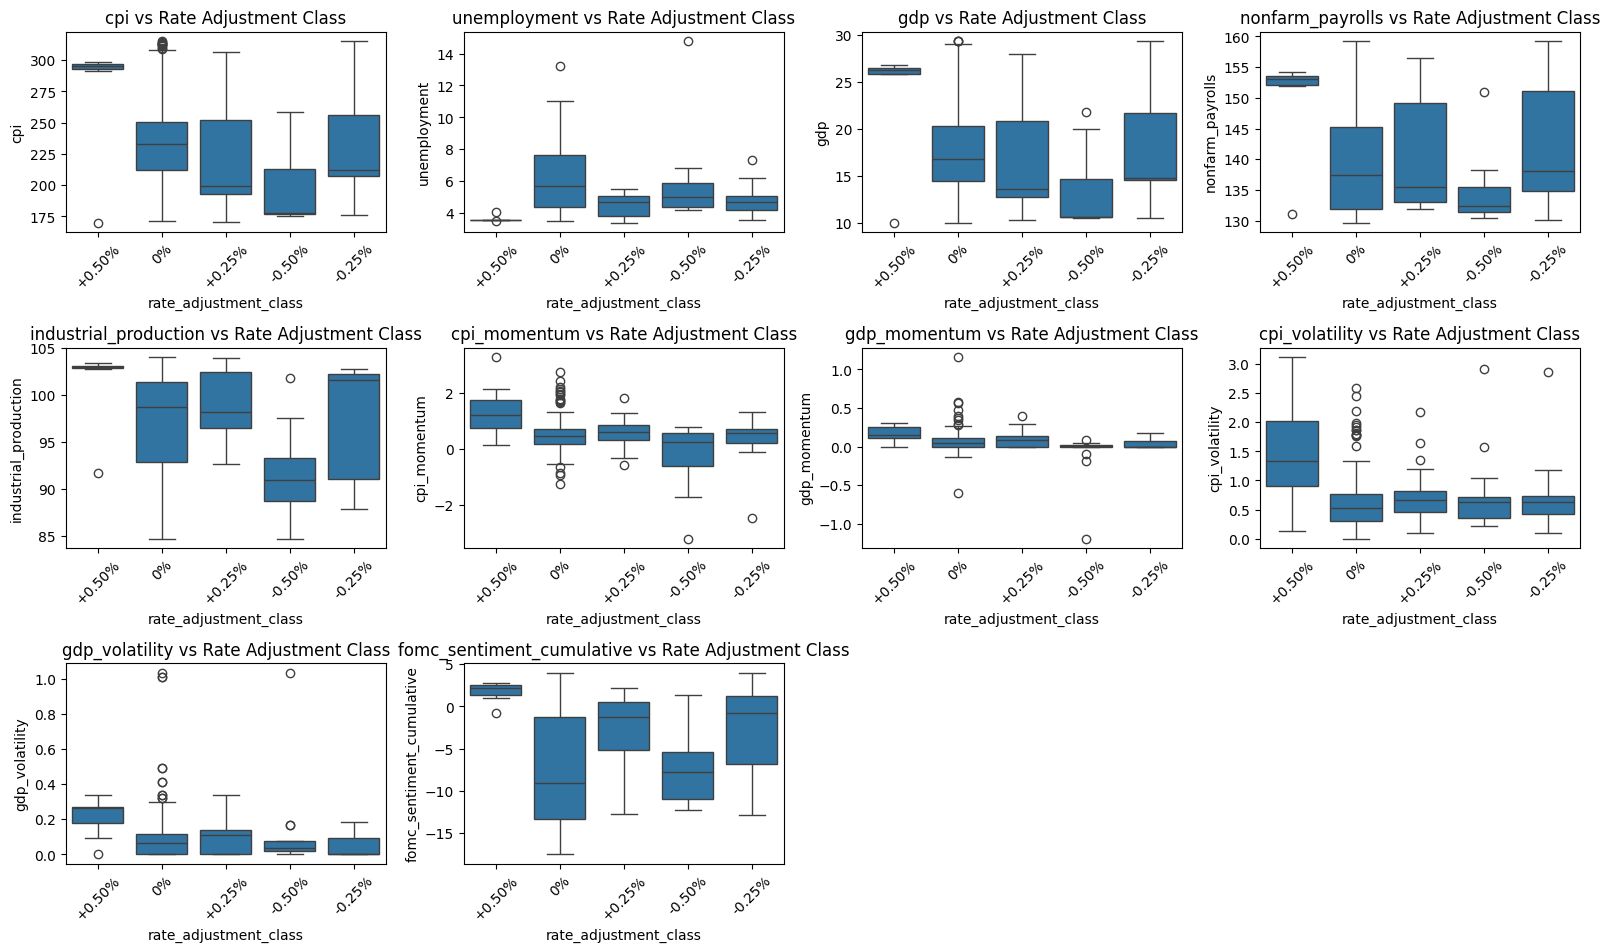

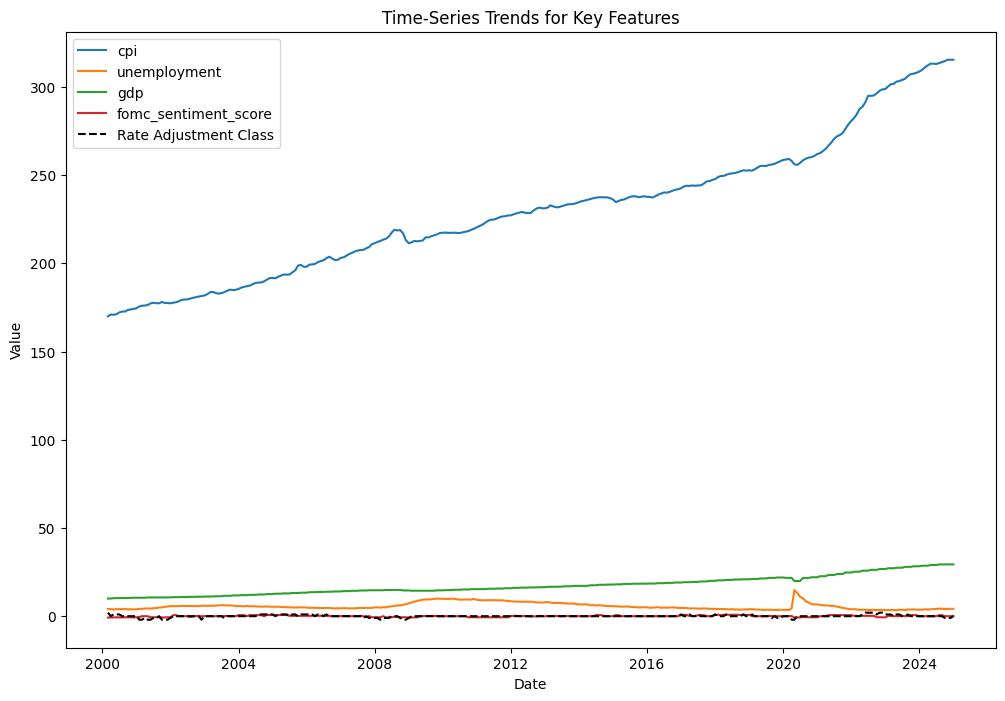

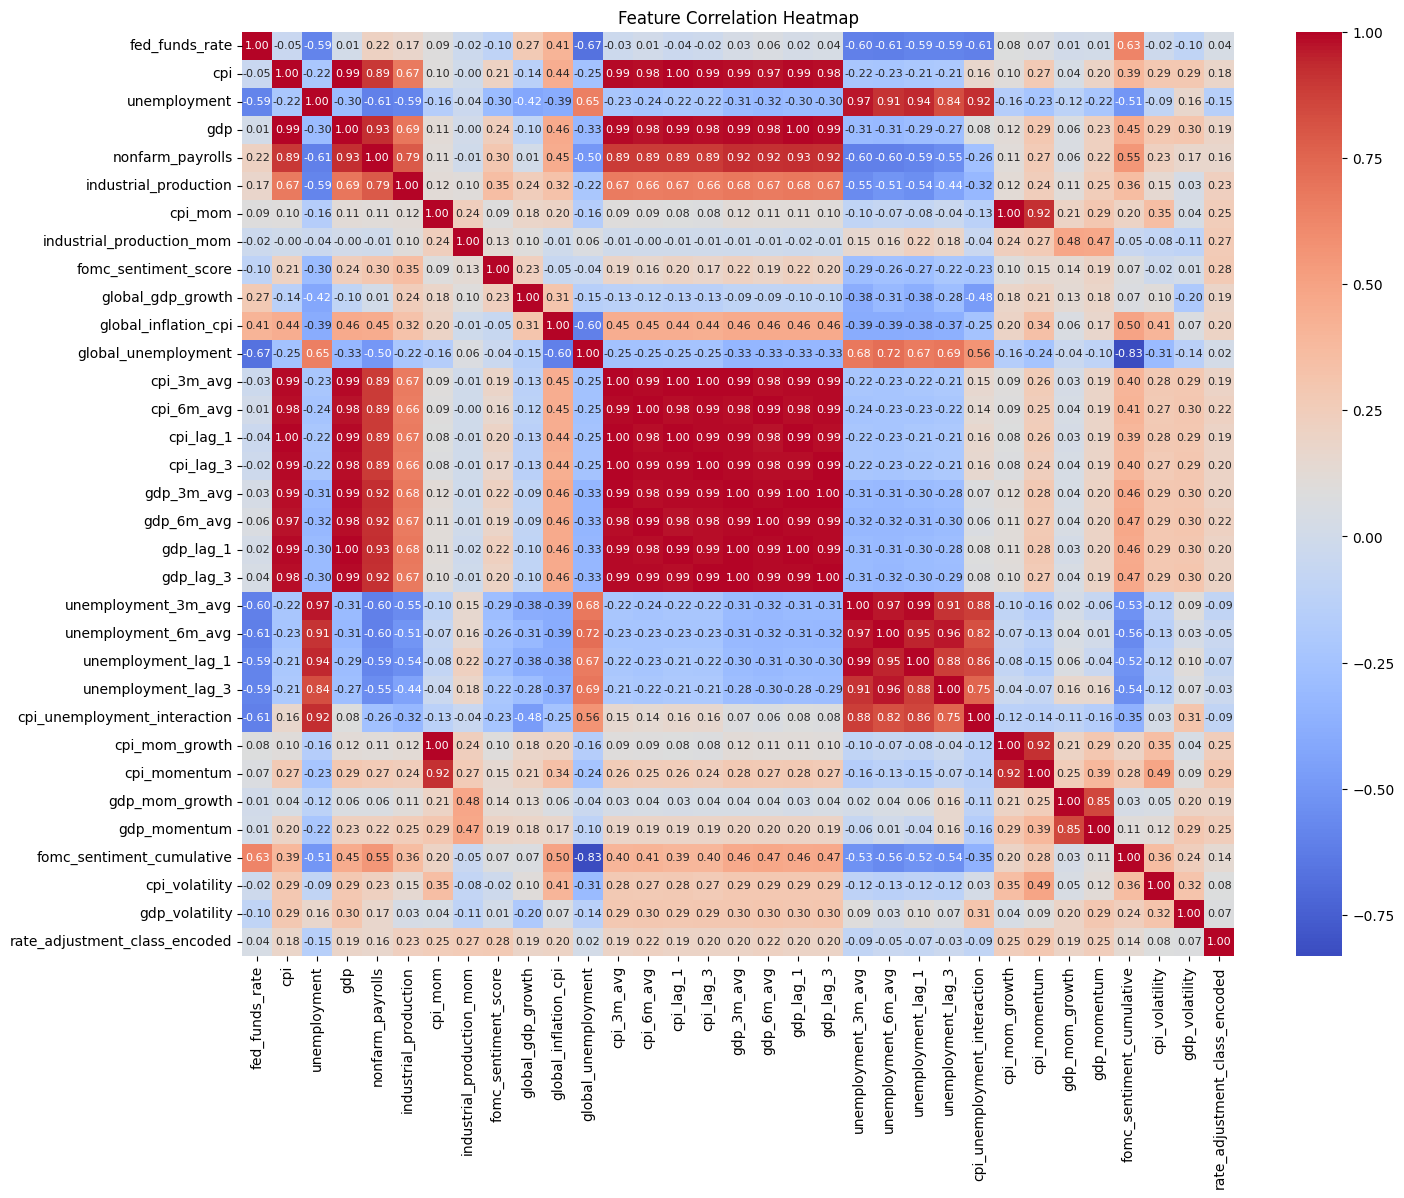

C:\Users\User\AppData\Local\Temp\ipykernel_9580\1655111886.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_feature_importances, x='Importance', y='Feature', palette='viridis')


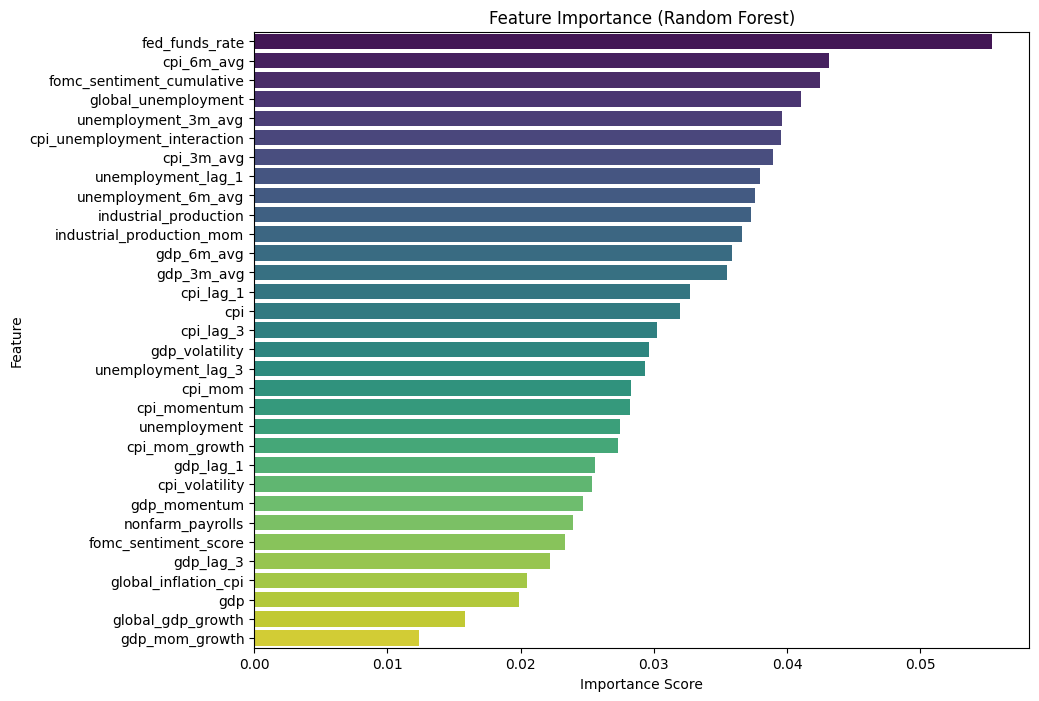

C:\Users\User\AppData\Local\Temp\ipykernel_9580\1655111886.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mutual_info_df, x='Mutual Information', y='Feature', palette='coolwarm')


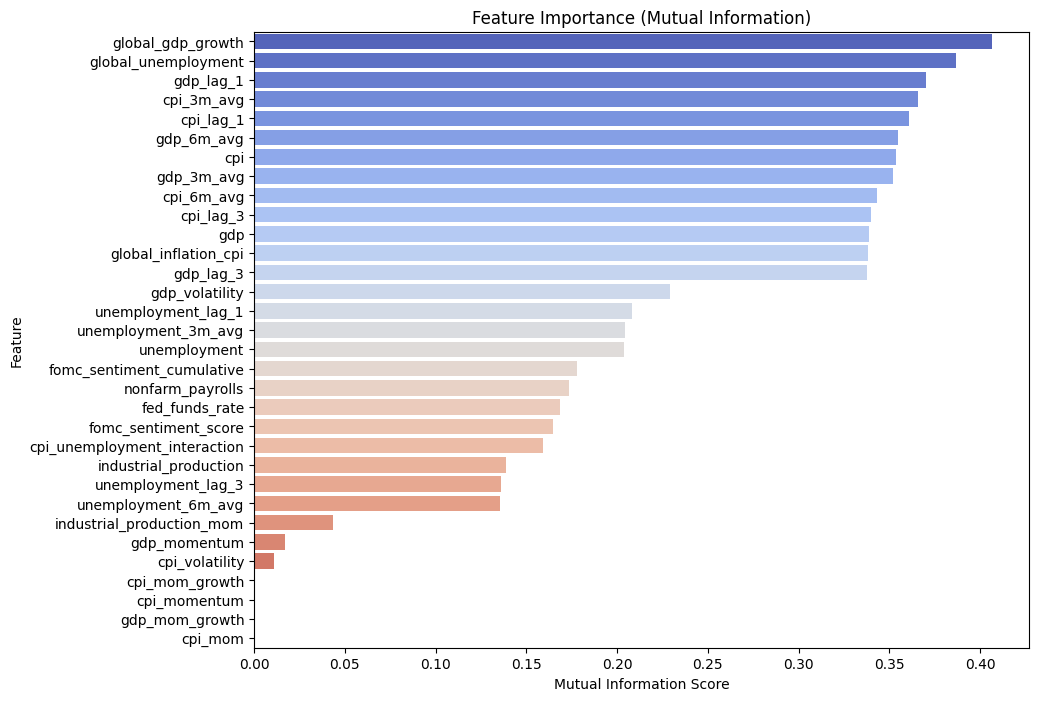

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

file_path = "C:\\Users\\User\\Desktop\\interest rate decision\\workfile\\final_merged_data_with_classes.xlsx"
df = pd.read_excel(file_path)

stance_encoder = LabelEncoder()
df['fomc_policy_stance_encoded'] = stance_encoder.fit_transform(df['fomc_policy_stance'])

rate_class_mapping = {"-0.50%": -2, "-0.25%": -1, "0%": 0, "+0.25%": 1, "+0.50%": 2}
df['rate_adjustment_class_encoded'] = df['rate_adjustment_class'].map(rate_class_mapping)

df.fillna(df.median(numeric_only=True), inplace=True)

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

macro_features = ['cpi', 'unemployment', 'gdp', 'nonfarm_payrolls', 'industrial_production']
engineered_features = ['cpi_momentum', 'gdp_momentum', 'cpi_volatility', 'gdp_volatility', 'fomc_sentiment_cumulative']
global_features = ['global_gdp_growth', 'global_inflation_cpi', 'global_unemployment']

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df[macro_features + engineered_features + global_features]),
                           columns=macro_features + engineered_features + global_features)


feature_groups = [macro_features, engineered_features, global_features]
titles = ["Macroeconomic Features", "Engineered Features", "Global Indicators"]

plt.figure(figsize=(16, 12))
for i, group in enumerate(feature_groups):
    plt.subplot(3, 1, i + 1)
    for feature in group:
        sns.kdeplot(scaled_data[feature], label=feature, fill=True, alpha=0.5)
    plt.title(f"Feature Distributions: {titles[i]}")
    plt.xlabel("Normalized Value")
    plt.ylabel("Density")
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.savefig("C:\\Users\\User\\Desktop\\interest rate decision\\workfile\\feature_distributions_grouped.png")
plt.show()


expanded_features = macro_features + engineered_features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(expanded_features, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x='rate_adjustment_class', y=feature)
    plt.title(f"{feature} vs Rate Adjustment Class")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("C:\\Users\\User\\Desktop\\interest rate decision\\workfile\\expanded_feature_target_boxplots.png")
plt.show()


features_to_plot = ['cpi', 'unemployment', 'gdp', 'fomc_sentiment_score']
plt.figure(figsize=(12, 8))
for feature in features_to_plot:
    plt.plot(df['date'], df[feature], label=feature)
plt.plot(df['date'], df['rate_adjustment_class_encoded'], label='Rate Adjustment Class', linestyle='--', color='black')
plt.title("Time-Series Trends for Key Features")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.savefig("C:\\Users\\User\\Desktop\\interest rate decision\\workfile\\time_series_trends.png")
plt.show()

correlation_data = df[numeric_columns].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_data, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, annot_kws={"size": 8})
plt.title("Feature Correlation Heatmap")
plt.savefig("C:\\Users\\User\\Desktop\\interest rate decision\\workfile\\correlation_heatmap_improved.png")
plt.show()

X = df[numeric_columns].drop(['rate_adjustment_class_encoded'], axis=1)
y = df['rate_adjustment_class_encoded']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
rf_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=rf_feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig("C:\\Users\\User\\Desktop\\interest rate decision\\workfile\\feature_importance_random_forest.png")
plt.show()

mutual_info = mutual_info_classif(X, y)
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=mutual_info_df, x='Mutual Information', y='Feature', palette='coolwarm')
plt.title("Feature Importance (Mutual Information)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.savefig("C:\\Users\\User\\Desktop\\interest rate decision\\workfile\\feature_importance_mutual_info.png")
plt.show()


# **Feature Analysis and Insights**

## **Introduction**
Predicting Federal Open Market Committee (FOMC) rate adjustments requires a deep understanding of economic dynamics and their influence on monetary policy. This section explores the engineered features, their relationships with the target variable (`Rate Adjustment Class`), and their broader economic implications. By systematically analyzing time-series trends, feature-target relationships, grouped distributions, and feature importance, we aim to build a comprehensive narrative that ties together macroeconomic conditions, engineered insights, and predictive modeling objectives.

Each analysis step leverages data visualizations to extract actionable insights, ensuring the features are not only theoretically sound but also empirically validated for their role in decision-making.

---

## **Detailed Analysis**

### **1. Time-Series Trends**
This visualization tracks the evolution of `CPI`, `Unemployment`, `GDP`, and `FOMC Sentiment Score` over time, with the target variable (`Rate Adjustment Class`) overlaid. It offers a chronological perspective, highlighting key historical events and their economic impact.

#### **Key Observations**:
- **CPI (Consumer Price Index)**:
  - Displays a consistent upward trend, reflecting inflationary pressures over the years.
  - **2008 Financial Crisis**: Inflation levels remained moderate during the crisis, yet policy adjustments were significant, demonstrating the FOMC's focus on financial stability over inflation control.
  - **2020 COVID-19 Pandemic**: A sharp post-recovery spike aligns with aggressive rate hikes to combat rising inflation.

- **Unemployment**:
  - Significant spikes during economic crises:
    - **2008**: Unemployment peaked as the financial crisis unfolded, prompting rate cuts to stimulate the economy.
    - **2020**: Rapid unemployment growth due to pandemic-induced shutdowns coincided with emergency rate reductions.
  - Recovery phases are marked by declining unemployment and corresponding rate hikes.

- **GDP (Gross Domestic Product)**:
  - Growth trends are interrupted by sharp contractions during crises:
    - **2008**: A significant GDP dip mirrors unemployment spikes.
    - **2020**: A rapid contraction followed by recovery illustrates the pandemic's economic disruption.

- **FOMC Sentiment Score**:
  - Oscillates between hawkish (pro-rate hikes) and dovish (pro-rate cuts) tones:
    - Hawkish sentiment peaks align with inflationary pressures, driving rate hikes.
    - Dovish sentiment emerges during periods of high unemployment, reflecting a focus on economic recovery.

#### **Insights**:
The synchronization between feature trends and `Rate Adjustment Class` highlights their predictive relevance. For instance, rising inflation (CPI) and declining unemployment are consistent with rate hikes, while the opposite trends correspond to rate cuts. This visualization underscores the need for features that capture temporal patterns and interactions between economic indicators.

---

### **2. Feature Correlation Heatmap**
The correlation heatmap provides a detailed view of linear relationships between numerical features. It serves as a foundation for feature engineering by identifying redundancies and complementary relationships.

#### **Key Observations**:
- **High Correlations**:
  - `CPI` and its rolling averages (`CPI_3M_Avg`, `CPI_6M_Avg`) exhibit near-perfect correlations, validating the use of rolling averages to smooth inflation trends.
  - `GDP` and `Global GDP Growth` are moderately correlated, reflecting the influence of global economic conditions on domestic policy.

- **Negative Correlations**:
  - `Unemployment` shows strong negative correlations with inflation (`CPI`) and GDP, aligning with the Phillips curve, which suggests an inverse relationship between unemployment and inflation.

- **Engineered Features**:
  - Momentum and volatility features exhibit weaker correlations with macroeconomic indicators but provide complementary insights into dynamic changes.

#### **Insights**:
The heatmap confirms that while certain features (e.g., rolling averages) capture long-term trends, engineered features like momentum and volatility capture transient dynamics. This balance ensures a comprehensive feature set.

---

### **3. Feature-Target Relationships (Boxplots)**
Boxplots examine the relationships between key features (`CPI`, `Unemployment`, `GDP`, etc.) and the target variable (`Rate Adjustment Class`), revealing how these features stratify across different rate adjustment scenarios.

#### **Key Observations**:
- **CPI**:
  - Higher inflation levels are distinctly associated with rate hikes (`+0.25%`, `+0.50%`).
  - Lower CPI values align with rate cuts (`-0.25%`, `-0.50%`), reflecting inflationary control as a key policy driver.

- **Unemployment**:
  - Elevated unemployment levels correlate with rate cuts, emphasizing the FOMC's mandate to support employment during downturns.

- **GDP**:
  - Positive GDP growth aligns with rate hikes, while contractions are linked to rate cuts, reinforcing its predictive role.

- **Volatility**:
  - Higher volatility features (e.g., `CPI Volatility`, `GDP Volatility`) align with significant rate adjustments, reflecting policy responses to economic instability.

#### **Insights**:
These relationships validate the inclusion of engineered features in the model. For example, momentum and volatility features provide nuanced insights into economic conditions that influence rate decisions.

---

### **4. Grouped Feature Distributions**
Features are grouped into macroeconomic, engineered, and global indicators for a clearer interpretation of their distributions.

#### **Key Observations**:
- **Macroeconomic Features**:
  - Smooth distributions for `CPI` and `GDP` reflect long-term stability interspersed with disruptions during crises.
  - `Unemployment` shows recovery phases with a skew toward lower values in recent years.

- **Engineered Features**:
  - Momentum features capture critical acceleration and deceleration phases, highlighting turning points in economic trends.
  - Volatility features have broader distributions, reflecting periods of significant instability.

- **Global Indicators**:
  - Distinct distributions for `Global GDP Growth`, `Global Inflation CPI`, and `Global Unemployment` emphasize the external economic conditions influencing U.S. monetary policy.

#### **Insights**:
The grouped distributions highlight each feature category's distinct role in shaping monetary policy decisions. These insights validate the normalization process and underscore the importance of diverse feature groups.

---

### **5. Feature Importance**
Feature importance rankings from Mutual Information and Random Forest provide complementary perspectives on feature relevance.

#### **Mutual Information**:
- **Top Features**:
  - `Global GDP Growth`: Highlights the significance of global economic conditions in policy decisions.
  - `Rolling Averages`: Capture long-term trends critical for rate forecasting.

- **Lower-Ranked Features**:
  - Momentum and volatility features complement traditional indicators by capturing dynamic changes.

#### **Random Forest**:
- **Top Features**:
  - `Fed Funds Rate`: Reflects the importance of historical rate adjustments in predicting future changes.
  - `CPI Rolling Averages` and `Cumulative Sentiment`: Highlight the value of smoothing trends and capturing long-term policy tones.

#### **Insights**:
Both rankings emphasize the importance of integrating macroeconomic indicators with engineered features for a comprehensive predictive framework.

---

## **Conclusion**
The detailed analysis of engineered features underscores their critical role in enhancing the predictive model's accuracy and interpretability. Time-series trends, feature-target relationships, and feature importance rankings collectively validate the inclusion of these features, ensuring the model captures both long-term trends and transient dynamics. This comprehensive approach provides a robust foundation for predicting FOMC rate adjustments, bridging data-driven insights with economic theory.
